In [113]:
import numpy as np
import os
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [2]:
test = pd.read_csv(r"C:\Users\adithya\Downloads\titanic\test.csv") #importing test data set 
df_test = test.copy()
train = pd.read_csv(r"C:\Users\adithya\Downloads\titanic\train.csv") #importing test data set 
df_train = train.copy()

### Filling NA values

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df_train = df_train.drop(["Cabin","Name","Ticket"], axis=1) # I'll delete the variable cabin because of it's over 78 percent, 
df_test = df_test.drop(["Cabin","Name", "Ticket",], axis =1)

In [14]:
# Filling missing Embarked values with most common value
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

In [42]:
df_test['Age'] = df_train['Age'].fillna(df_train['Age'].median())

In [41]:
df_train['Fare'] = df_train['Fare'].fillna(df_train['Fare'].median())

In [17]:
# Filling missing Fare value with mean value
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())

##### converting to strings

In [16]:
#Pclass' is a categorical feature so we convert its values to strings
df_train['Pclass'] = train['Pclass'].apply(str)
df_test['Pclass'] = test['Pclass'].apply(str)

##### knn imputer

In [53]:
from sklearn.impute import KNNImputer

In [54]:
n_dftrain = df_train.select_dtypes(include = ['float64', 'int64']) #because the imputer method don't except the string value 
n_dftest = df_train.select_dtypes(include = ['float64', 'int64'])

In [55]:
var_namestrain = list(n_dftrain)
var_namestest = list(n_dftest)

In [56]:
n_dftrain = np.array(n_dftrain) 
n_dftest = np.array(n_dftest)

In [57]:
imputer = KNNImputer(n_neighbors=4)

# Impute the missing values in the training data
n_dftrain_imputed = imputer.fit_transform(n_dftrain)

# Impute the missing values in the test data
n_dftest_imputed = imputer.transform(n_dftest)

In [60]:
n_dftrain = pd.DataFrame(n_dftrain_imputed, columns = var_namestrain)
n_dftest = pd.DataFrame(n_dftest_imputed, columns = var_namestest)

In [61]:
df_train['Age'] = n_dftrain['Age']
df_test['Age'] = n_dftest['Age']

In [32]:
for col in df_train.dtypes[df_train.dtypes == 'object'].index:
   for_dummy = df_train.pop(col)
   df_train = pd.concat([df_train, pd.get_dummies(for_dummy, prefix=col)], axis=1)

In [37]:
for col in df_test.dtypes[df_test.dtypes == 'object'].index:
   for_dummy = df_test.pop(col)
   df_test = pd.concat([df_test, pd.get_dummies(for_dummy, prefix=col)], axis=1)

In [63]:
df_train['Age'] = df_train['Age'].apply(int)
df_test['Age'] = df_test['Age'].apply(int)

<Axes: ylabel='Survived'>

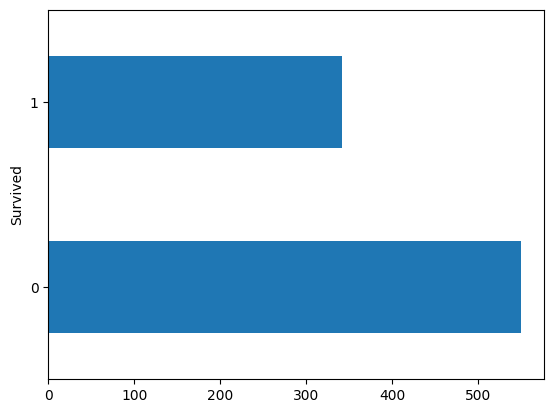

In [69]:
df_train["Survived"].value_counts().plot.barh()

## Logistic Regression

In [70]:
y = df_train['Survived']

In [71]:
X = df_train.drop(['Survived'], axis=1)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
loj = LogisticRegression(solver = "liblinear") 
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [75]:
loj_model.intercept_

array([0.41987694])

In [76]:
loj_model.coef_

array([[ 3.35594346e-04, -2.73521057e-02, -2.38189079e-01,
        -1.18029431e-01,  4.45585871e-03,  7.42039068e-01,
         4.71334387e-01, -7.93496517e-01,  1.48139271e+00,
        -1.06151577e+00,  3.99729467e-01,  2.37539910e-01,
        -2.17392439e-01]])

##### Predicting the model

In [77]:
y_pred = loj_model.predict(X_train)

In [79]:
accuracy_score(y_test ,loj_model.predict(X_test)) 

0.8022388059701493

In [78]:
accuracy_score(y_train ,y_pred)

0.8089887640449438

In [80]:
cross_val_score(loj_model, X_test, y_test, cv=10).mean() 

0.8212250712250713

## Support Vector Classifier (SVC)

In [82]:
y = df_train['Survived']

In [83]:
X = df_train.drop(['Survived'], axis= 1)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

In [85]:
svm_model = SVC(kernel = 'linear').fit(X_train, y_train)

In [86]:
y_pred = svm_model.predict(X_test)

In [87]:
accuracy_score(y_test , y_pred)

0.8022388059701493

#### tuning

In [91]:
svc_params = {"C": np.arange(1,10)} # 0 value gives us an exception 

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 5, 
                            n_jobs = -1, 
                            verbose = 2 )

In [ ]:
svc_cv_model.fit(X_train, y_train)

In [ ]:
print("Best Params: " + str(svc_cv_model.best_params_))

In [93]:
svc_tuned = SVC(kernel = "linear", C = 3).fit(X_train, y_train) # we created new model with best params that we have found

In [94]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.8097014925373134

#### Using Radial function

In [95]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train)

In [96]:
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred) # primitive score

0.6082089552238806

In [97]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

In [98]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             verbose=2)

In [99]:
print("Best Params: " + str(svc_cv_model.best_params_))

Best Params: {'C': 100, 'gamma': 0.0001}


In [100]:
svc_tuned = SVC(C = 100, gamma = 0.0001).fit(X_train, y_train)

In [101]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.6791044776119403

## Naive Bayes

In [102]:
y = df_train["Survived"] # this is our dependent variable

In [103]:
X = df_train.drop(["Survived"], axis=1) # these are our independent variables

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

In [105]:
from sklearn.naive_bayes import GaussianNB

In [106]:
# we created our model then have fitted it to our train data
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train) 
nb_model

GaussianNB()

In [107]:
nb_model.predict(X_test)[0:10] # we can see predicted values like this

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [108]:
nb_model.predict_proba(X_test)[0:10] # these are probablity of predicted values

array([[8.91719362e-01, 1.08280638e-01],
       [9.57418746e-01, 4.25812540e-02],
       [9.96126458e-01, 3.87354170e-03],
       [7.76526486e-03, 9.92234735e-01],
       [6.17902549e-03, 9.93820975e-01],
       [9.63759784e-04, 9.99036240e-01],
       [4.49620477e-02, 9.55037952e-01],
       [9.98768577e-01, 1.23142292e-03],
       [4.06542233e-02, 9.59345777e-01],
       [5.05624497e-03, 9.94943755e-01]])

In [109]:
y_pred = nb_model.predict(X_test) #  now our model is predicting the y values

In [110]:
accuracy_score(y_test ,y_pred) # test doğruluk oranı

0.7873134328358209

In [111]:
cross_val_score(nb_model, X_test, y_test, cv=10).mean() # verified accuracy score

0.7726495726495727

## Comparing Models

In [112]:
modeller = [
    loj_model,
    svc_tuned,
    nb_model,    
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
LogisticRegression:
Accuracy: 80.2239%
----------------------------
SVC:
Accuracy: 67.9104%
----------------------------
GaussianNB:
Accuracy: 78.7313%
